In [19]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [20]:
file = 'data1.csv'
original_data = np.loadtxt(file, delimiter=",")

#N,n = original_data.shape
data = np.column_stack((np.ones(original_data.shape[0]),original_data)) # 1's column added to original data
N,n = data.shape

In [21]:
X = data[:,0:n-1]
y = data[:,n-1:n]
w = np.random.randn(n-1,1)
from mpl_toolkits import mplot3d
#w.shape

In [22]:
#cost function - least square cost function
def Cost_Function(X,y,w):
    J = 0
    N,n = X.shape
    J=(((X.dot(w)-y).T).dot((X.dot(w)-y)))*(1/(2*N))
    return J

#gradient descent
def Grad_Desc(X,y,w,α,epochs):# α - learning rate
    N,n = X.shape
    #w_old = w + 10*w
    #print('w-w old ',w-w_old)
    #while False in np.isclose(w, w_old, atol=0.001):
    for i in range(epochs):
        w_old = w
        w = w-((X.T).dot(X.dot(w)-y))*(α/N)
        J = Cost_Function(X,y,w)
        #print("iteration : {} w value : {} J vale : {}".format(i,w,J))
        plt.scatter(i,J)
    return w

# J(w) v/s Iteration

Cost Function value J(w) is : 
 [[10.11239179]]
w value is : 
 [[1.4676195 ]
 [3.65297181]]


Text(0,0.5,'Cost function J(w)')

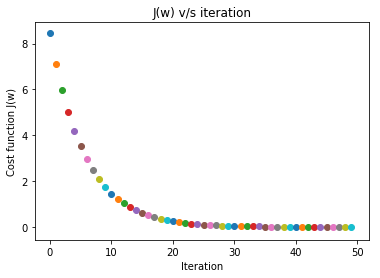

In [14]:
J = Cost_Function(X,y,w)
print("Cost Function value J(w) is : \n",J)
w = Grad_Desc(X,y,w,0.09,50)
print("w value is : \n",w)
plt.title("J(w) v/s iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost function J(w)")

# J(w) v/s w

Text(0.5,0,'$J(w)$')

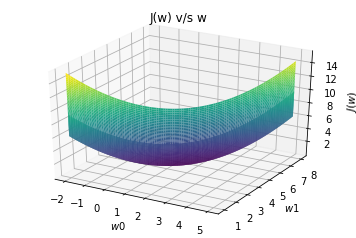

In [15]:
w0_values = np.linspace(-2,5,100)
w1_values = np.linspace(1,8,100)
cost_values = np.zeros((len(w0_values),len(w1_values)))
for i in range(len(w0_values)):
    for j in range(len(w1_values)):
        temp = np.array([[w0_values[i]],[w1_values[j]]],dtype=float)
        cost_values[i,j] = Cost_Function(X,y,temp)
cost_values=cost_values.T

ax = plt.axes(projection='3d')
ax.plot_surface(w0_values, w1_values, cost_values, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('J(w) v/s w');
ax.set_xlabel('$w0$')
ax.set_ylabel('$w1$')
ax.set_zlabel('$J(w)$')

# Hyperplane

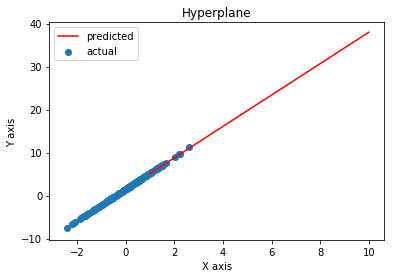

In [16]:
w0,w1 = w[0],w[1]
x = np.linspace(1,10,20)
fx = w0 + w1*x
plt.plot(x,fx,'b',label='predicted',color='r')
plt.scatter(X[:,[1]],y[:,[0]],label='actual')
plt.legend()
plt.xlabel("X axis")
plt.ylabel('Y axis')
plt.title('Hyperplane')
plt.show()

# Parameters

In [17]:
print("Parameters : \n")
print("w values are {} and {} ".format(w0,w1))
print("Cost Function value is : {} ".format(J))

Parameters : 

w values are [1.4676195] and [3.65297181] 
Cost Function value is : [[10.11239179]] 


In [18]:
#print(w+10*w)

[[16.14381447]
 [40.18268992]]
